In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import re
import time
import warnings
import sqlite3
from sqlalchemy import create_engine # database connection
import csv
import os
warnings.filterwarnings("ignore")
import datetime as dt
import numpy as np
from nltk.corpus import stopwords
from sklearn.decomposition import TruncatedSVD
from sklearn.preprocessing import normalize
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.manifold import TSNE
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics.classification import accuracy_score, log_loss
from sklearn.feature_extraction.text import TfidfVectorizer
from collections import Counter
from scipy.sparse import hstack
from sklearn.multiclass import OneVsRestClassifier
from sklearn.svm import SVC
from sklearn.model_selection import StratifiedKFold 
from collections import Counter, defaultdict
from sklearn.calibration import CalibratedClassifierCV
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
import math
from sklearn.metrics import normalized_mutual_info_score
from sklearn.ensemble import RandomForestClassifier



from sklearn.model_selection import cross_val_score
from sklearn.linear_model import SGDClassifier
from mlxtend.classifier import StackingClassifier

from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_recall_curve, auc, roc_curve

In [1]:
!curl --header "Host: doc-0c-7c-docs.googleusercontent.com" --header "User-Agent: Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/90.0.4430.93 Safari/537.36" --header "Accept: text/html,application/xhtml+xml,application/xml;q=0.9,image/avif,image/webp,image/apng,*/*;q=0.8,application/signed-exchange;v=b3;q=0.9" --header "Accept-Language: en-US,en;q=0.9" --header "Cookie: AUTH_q4032iqu1jsg9ockb0a98liqou2gs1kl_nonce=gj7udr1aftncq" --header "Connection: keep-alive" "https://doc-0c-7c-docs.googleusercontent.com/docs/securesc/ff4hud39uruli0nvn2uljqpvbthrca3k/3hm60jeg7i02ru0df3gr1cnp9jeouuva/1620305475000/05393963687578437339/05393963687578437339/1kSrh7m6rZzYuHRXHTYfeRZ29KWtGyi_k?e=download&authuser=0&nonce=gj7udr1aftncq&user=05393963687578437339&hash=2eoookefbecuu07uv4s87a1g48o5flmp" -L -o "final_features.xls"

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 1486M    0 1486M    0     0   112M      0 --:--:--  0:00:13 --:--:--  107M


In [3]:
data = pd.read_csv("final_features.xls")

In [4]:
data.shape
data.columns

Index(['Unnamed: 0', 'id', 'is_duplicate', 'cwc_min', 'cwc_max', 'csc_min',
       'csc_max', 'ctc_min', 'ctc_max', 'last_word_eq',
       ...
       '86_y', '87_y', '88_y', '89_y', '90_y', '91_y', '92_y', '93_y', '94_y',
       '95_y'],
      dtype='object', length=221)

In [5]:
data.drop(data.index[0], inplace=True)
y_true = data['is_duplicate']
data.drop(['Unnamed: 0', 'id','is_duplicate'], axis=1, inplace=True)

In [6]:
data.head()

,cwc_min,cwc_max,csc_min,csc_max,ctc_min,ctc_max,last_word_eq,first_word_eq,abs_len_diff,mean_len,token_set_ratio,token_sort_ratio,fuzz_ratio,fuzz_partial_ratio,longest_substr_ratio,freq_qid1,freq_qid2,q1len,q2len,q1_n_words,q2_n_words,word_Common,word_Total,word_share,freq_q1+q2,freq_q1-q2,0_x,1_x,2_x,3_x,4_x,5_x,6_x,7_x,8_x,9_x,10_x,11_x,12_x,13_x,...,56_y,57_y,58_y,59_y,60_y,61_y,62_y,63_y,64_y,65_y,66_y,67_y,68_y,69_y,70_y,71_y,72_y,73_y,74_y,75_y,76_y,77_y,78_y,79_y,80_y,81_y,82_y,83_y,84_y,85_y,86_y,87_y,88_y,89_y,90_y,91_y,92_y,93_y,94_y,95_y
1,0.799984,0.399996,0.749981,0.599988,0.699993,0.466664,0.0,1.0,5.0,12.5,86,63,66,75,0.596154,4,1,51,88,8,13,4.0,20.0,0.200000,5,3,18.990903,48.390127,14.231475,-12.000782,-2.324469,-20.050934,-16.054571,-15.817222,3.254204,-39.863552,-5.732110,16.764240,-6.286267,51.523229,...,-6.703283,38.707240,-2.004246,10.943957,6.939164,-29.377101,2.708680,-17.891386,-4.676417,-20.983053,-28.916487,-7.633589,23.772903,32.405377,31.816968,0.750492,34.393946,-16.716336,-26.832640,17.221546,-23.408625,52.987002,-30.076725,-2.197162,-3.602881,29.818667,23.392630,27.585504,22.509194,61.032456,-37.242324,-31.066498,-45.401839,-23.039135,-5.305946,19.393062,16.864331,-17.193637,19.457991,-29.883955
2,0.399992,0.333328,0.399992,0.249997,0.399996,0.285712,0.0,1.0,4.0,12.0,63,63,43,47,0.166667,1,1,73,59,14,10,4.0,24.0,0.166667,2,0,54.692790,-3.394842,-5.179488,-21.129708,-1.274346,-1.072261,-6.901471,4.729387,12.129092,-55.807840,21.461191,11.275974,-11.615079,-21.504896,...,3.392246,15.236589,27.434457,-3.709323,-5.696425,23.750769,-1.699531,-16.334547,-35.165802,-41.296026,-5.155230,-5.449731,9.132308,29.649904,-12.309636,10.585700,52.685472,-69.139046,-22.184717,8.482476,-30.841373,6.919542,-15.356706,32.742861,-1.047692,2.928473,9.828119,48.421745,-26.547052,-19.798348,-47.572795,-25.605735,-2.952530,-14.122936,-15.086713,18.696403,-10.663276,-16.244420,9.462038,-27.573773
3,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,2.0,12.0,28,24,9,14,0.039216,1,1,50,65,11,9,0.0,19.0,0.000000,2,0,-38.413668,-20.697512,35.373632,6.285548,-27.103690,8.391107,-3.117381,-53.872670,6.734550,-25.842004,13.372607,-4.118453,-10.049013,-41.711986,...,7.546965,21.577214,-0.244428,13.607121,-7.503899,9.891037,-1.225415,13.937596,-3.934570,-2.152220,-2.473060,-21.625663,-1.152244,19.471276,3.051951,-0.742060,30.654455,-34.266188,-20.011706,5.109464,-12.992698,7.378692,-3.851501,-10.514132,-16.314590,-2.474200,14.080365,15.971990,-20.457514,-7.381443,-6.002135,-17.760922,-8.941550,-5.513340,9.070526,-11.465428,-10.020497,6.949863,-11.345793,-8.980597
4,0.399992,0.199998,0.999950,0.666644,0.571420,0.307690,0.0,1.0,6.0,10.0,67,47,35,56,0.175000,3,1,76,39,13,7,2.0,20.0,0.100000,4,2,92.387065,74.556793,13.198928,-4.791839,-51.456339,-3.113263,-41.945071,26.884295,18.497083,-24.449814,2.536887,-7.612244,14.824398,16.484670,...,-4.719641,1.089893,19.041971,4.584175,-34.396003,-1.644867,-0.382564,-4.819139,-11.735326,-24.889085,0.275735,6.790176,4.238333,12.325270,18.389821,-1.271260,8.241363,-11.778213,-28.414627,-6.891484,-15.242220,1.093195,-26.322591,-12.769830,-6.546742,15.615443,8.443107,1.848276,16.765507,-10.090781,-11.907323,-20.781591,-21.847627,-19.488209,-27.055906,-10.091496,-10.345057,9.702323,6.626533,-13.139183
5,0.666656,0.571420,0.888879,0.799992,0.705878,0.705878,1.0,0.0,0.0,17.0,81,77,73,73,0.160920,1,1,86,90,16,16,8.0,31.0,0.258065,2,0,109.415443,54.642291,-2.891579,-20.572597,17.423599,0.628699,-10.117341,23.578644,9.283576,-22.231160,-5.554398,8.036075,-2.249719,-26.458080,...,13.651259,16.298693,-23.903019,28.494335,9.048712,-6.984319,-53.700683,-0.745364,3.967229,8.196167,-46.813312,-23.465181,38.956789,37.703788,10.780330,-4.344902,-4.344963,-44.933435,-51.980051,16.994406,13.894930,43.333008,-18.507479,12.996556,25.384925,23.799569,35.117081,56.427780,6.359186,18.348062,18.027855,-29.503190,-45.222362,-38.541124,-38.017073,10.621900,51.908481,-45.285058,40.645111,19.894891


In [7]:
# after we read from sql table each entry was read it as a string
# we convert all the features into numaric before we apply any model
cols = list(data.columns)
for i in cols:
    data[i] = data[i].apply(pd.to_numeric)
    print(i)

cwc_min
cwc_max
csc_min
csc_max
ctc_min
ctc_max
last_word_eq
first_word_eq
abs_len_diff
mean_len
token_set_ratio
token_sort_ratio
fuzz_ratio
fuzz_partial_ratio
longest_substr_ratio
freq_qid1
freq_qid2
q1len
q2len
q1_n_words
q2_n_words
word_Common
word_Total
word_share
freq_q1+q2
freq_q1-q2
0_x
1_x
2_x
3_x
4_x
5_x
6_x
7_x
8_x
9_x
10_x
11_x
12_x
13_x
14_x
15_x
16_x
17_x
18_x
19_x
20_x
21_x
22_x
23_x
24_x
25_x
26_x
27_x
28_x
29_x
30_x
31_x
32_x
33_x
34_x
35_x
36_x
37_x
38_x
39_x
40_x
41_x
42_x
43_x
44_x
45_x
46_x
47_x
48_x
49_x
50_x
51_x
52_x
53_x
54_x
55_x
56_x
57_x
58_x
59_x
60_x
61_x
62_x
63_x
64_x
65_x
66_x
67_x
68_x
69_x
70_x
71_x
72_x
73_x
74_x
75_x
76_x
77_x
78_x
79_x
80_x
81_x
82_x
83_x
84_x
85_x
86_x
87_x
88_x
89_x
90_x
91_x
92_x
93_x
94_x
95_x
0_y
1_y
2_y
3_y
4_y
5_y
6_y
7_y
8_y
9_y
10_y
11_y
12_y
13_y
14_y
15_y
16_y
17_y
18_y
19_y
20_y
21_y
22_y
23_y
24_y
25_y
26_y
27_y
28_y
29_y
30_y
31_y
32_y
33_y
34_y
35_y
36_y
37_y
38_y
39_y
40_y
41_y
42_y
43_y
44_y
45_y
46_y
47_y
48_y
49_y

In [8]:
y_true = list(map(int, y_true.values))

In [9]:
X_train,X_test, y_train, y_test = train_test_split(data, y_true, stratify=y_true, test_size=0.3)

In [10]:
print("Number of data points in train data :",X_train.shape)
print("Number of data points in test data :",X_test.shape)

Number of data points in train data : (283002, 218)
Number of data points in test data : (121287, 218)


In [11]:
print("-"*10, "Distribution of output variable in train data", "-"*10)
train_distr = Counter(y_train)
train_len = len(y_train)
print("Class 0: ",int(train_distr[0])/train_len,"Class 1: ", int(train_distr[1])/train_len)
print("-"*10, "Distribution of output variable in train data", "-"*10)
test_distr = Counter(y_test)
test_len = len(y_test)
print("Class 0: ",int(test_distr[1])/test_len, "Class 1: ",int(test_distr[1])/test_len)

---------- Distribution of output variable in train data ----------
Class 0:  0.6308011957512668 Class 1:  0.36919880424873325
---------- Distribution of output variable in train data ----------
Class 0:  0.3691986775169639 Class 1:  0.3691986775169639


In [12]:
# This function plots the confusion matrices given y_i, y_i_hat.
def plot_confusion_matrix(test_y, predict_y):
    C = confusion_matrix(test_y, predict_y)
    # C = 9,9 matrix, each cell (i,j) represents number of points of class i are predicted class j
    
    A =(((C.T)/(C.sum(axis=1))).T)
    #divid each element of the confusion matrix with the sum of elements in that column
    
    # C = [[1, 2],
    #     [3, 4]]
    # C.T = [[1, 3],
    #        [2, 4]]
    # C.sum(axis = 1)  axis=0 corresonds to columns and axis=1 corresponds to rows in two diamensional array
    # C.sum(axix =1) = [[3, 7]]
    # ((C.T)/(C.sum(axis=1))) = [[1/3, 3/7]
    #                           [2/3, 4/7]]

    # ((C.T)/(C.sum(axis=1))).T = [[1/3, 2/3]
    #                           [3/7, 4/7]]
    # sum of row elements = 1
    
    B =(C/C.sum(axis=0))
    #divid each element of the confusion matrix with the sum of elements in that row
    # C = [[1, 2],
    #     [3, 4]]
    # C.sum(axis = 0)  axis=0 corresonds to columns and axis=1 corresponds to rows in two diamensional array
    # C.sum(axix =0) = [[4, 6]]
    # (C/C.sum(axis=0)) = [[1/4, 2/6],
    #                      [3/4, 4/6]] 
    plt.figure(figsize=(20,4))
    
    labels = [1,2]
    # representing A in heatmap format
    cmap=sns.light_palette("blue")
    plt.subplot(1, 3, 1)
    sns.heatmap(C, annot=True, cmap=cmap, fmt=".3f", xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')
    plt.title("Confusion matrix")
    
    plt.subplot(1, 3, 2)
    sns.heatmap(B, annot=True, cmap=cmap, fmt=".3f", xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')
    plt.title("Precision matrix")
    
    plt.subplot(1, 3, 3)
    # representing B in heatmap format
    sns.heatmap(A, annot=True, cmap=cmap, fmt=".3f", xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')
    plt.title("Recall matrix")
    
    plt.show()

Log loss on Test Data using Random Model 0.8829847583219038


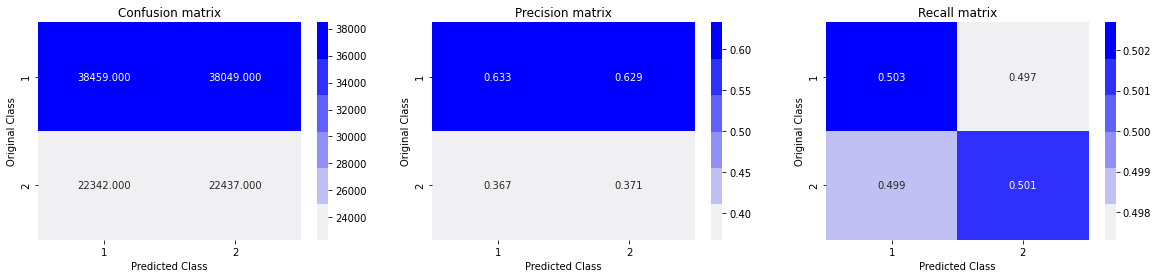

In [13]:
predicted_y = np.zeros((test_len,2))
for i in range(test_len):
    rand_probs = np.random.rand(1,2)
    predicted_y[i] = ((rand_probs/sum(sum(rand_probs)))[0])
print("Log loss on Test Data using Random Model",log_loss(y_test, predicted_y, eps=1e-15))

predicted_y =np.argmax(predicted_y, axis=1)
plot_confusion_matrix(y_test, predicted_y)

In [16]:
import xgboost as xgb
params = {}
params['objective'] = 'binary:logistic'
params['eval_metric'] = 'logloss'
params['eta'] = 0.02
params['max_depth'] = 4

d_train = xgb.DMatrix(X_train, label=y_train)
d_test = xgb.DMatrix(X_test, label=y_test)

watchlist = [(d_train, 'train'), (d_test, 'valid')]

bst = xgb.train(params, d_train, 400, watchlist, early_stopping_rounds=20, verbose_eval=10)

xgdmat = xgb.DMatrix(X_train,y_train)
predict_y = bst.predict(d_test)
print("The test log loss is:",log_loss(y_test, predict_y, eps=1e-15))

[0]	train-logloss:0.684536	valid-logloss:0.684881
Multiple eval metrics have been passed: 'valid-logloss' will be used for early stopping.

Will train until valid-logloss hasn't improved in 20 rounds.
[10]	train-logloss:0.615054	valid-logloss:0.615236
[20]	train-logloss:0.564094	valid-logloss:0.564563
[30]	train-logloss:0.526778	valid-logloss:0.527381
[40]	train-logloss:0.497161	valid-logloss:0.49821
[50]	train-logloss:0.474067	valid-logloss:0.475312
[60]	train-logloss:0.455436	valid-logloss:0.456805
[70]	train-logloss:0.440747	valid-logloss:0.44211
[80]	train-logloss:0.428877	valid-logloss:0.43033
[90]	train-logloss:0.419256	valid-logloss:0.420804
[100]	train-logloss:0.411406	valid-logloss:0.412959
[110]	train-logloss:0.404513	valid-logloss:0.4062
[120]	train-logloss:0.398963	valid-logloss:0.400643
[130]	train-logloss:0.394164	valid-logloss:0.395892
[140]	train-logloss:0.390303	valid-logloss:0.39207
[150]	train-logloss:0.386862	valid-logloss:0.388757
[160]	train-logloss:0.383739	valid

Total number of data points : 121287


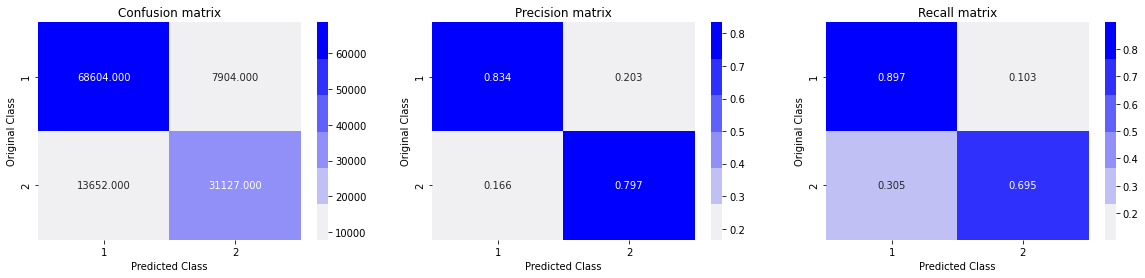

In [17]:
predicted_y =np.array(predict_y>0.5,dtype=int)
print("Total number of data points :", len(predicted_y))
plot_confusion_matrix(y_test, predicted_y)


## The XGBoost model gave us	
- Test log loss is: 0.35562974671504105
- So far this model has outperformed every other model and when compared to other models the logg loss value has been decreased without any hyperparameter  tuning.
- the test logg loss can be decreased further by hyperparameter tuning this model